In [1]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as web
import datetime as dt

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.models import Sequential

In [2]:
currency = 'DOGE-USD'

In [3]:
start_time = dt.datetime(2015, 8, 25)
end_time = dt.datetime.now()

In [4]:
df = web.DataReader(currency, 'yahoo', start_time, end_time)

In [5]:
df.sample(5)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-02-02,0.034926,0.029195,0.034910,0.031520,3.090897e+09,0.031520
2017-02-24,0.000211,0.000202,0.000208,0.000208,1.182020e+05,0.000208
2019-01-30,0.001970,0.001914,0.001925,0.001961,1.181302e+07,0.001961
2017-02-06,0.000216,0.000208,0.000210,0.000214,9.088400e+04,0.000214
2016-12-05,0.000217,0.000208,0.000216,0.000215,1.255420e+05,0.000215


In [6]:
# Preparing data

In [7]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df['Close'].values.reshape(-1, 1))

In [8]:
prediction_days = 90

x_train = []
y_train = []

for x in range(prediction_days, len(scaled_data)):
    x_train.append(scaled_data[x- prediction_days:x, 0])
    y_train.append(scaled_data[x, 0])

x_train = np.array(x_train)
y_train = np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [9]:
# Build the model

In [10]:
model = Sequential([
    LSTM(units=75, return_sequences=True, input_shape=(x_train.shape[1], 1)),
    Dropout(0.25),
    LSTM(units=75, return_sequences=True),
    Dropout(0.25),
    LSTM(units=75),
    Dropout(0.25),
    Dense(units=1)
])

model.compile(optimizer='Adam', loss='mse', metrics=['acc'])
hist = model.fit(x_train, y_train, epochs=75, batch_size=128)

Epoch 1/75
16/16 [==============================] - 5s 146ms/step - loss: 0.0033 - acc: 0.0000e+00
Epoch 2/75
16/16 [==============================] - 2s 155ms/step - loss: 0.0011 - acc: 0.0000e+00
Epoch 3/75
16/16 [==============================] - 3s 156ms/step - loss: 0.0014 - acc: 0.0000e+00
Epoch 4/75
16/16 [==============================] - 3s 165ms/step - loss: 7.8917e-04 - acc: 0.0000e+00
Epoch 5/75
16/16 [==============================] - 3s 184ms/step - loss: 0.0012 - acc: 0.0000e+00
Epoch 6/75
16/16 [==============================] - 3s 176ms/step - loss: 6.6407e-04 - acc: 0.0000e+00
Epoch 7/75
16/16 [==============================] - 3s 182ms/step - loss: 8.8857e-04 - acc: 0.0000e+00
Epoch 8/75
16/16 [==============================] - 2s 145ms/step - loss: 0.0011 - acc: 0.0000e+00
Epoch 9/75
16/16 [==============================] - 2s 147ms/step - loss: 8.0794e-04 - acc: 0.0000e+00
Epoch 10/75
16/16 [==============================] - 3s 161ms/step - loss: 7.6585e-04 - acc: 

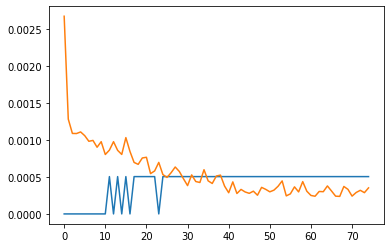

In [11]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['loss'])
plt.show()

In [12]:
test_start_time = dt.datetime(2021, 4, 1)
test_end_time = dt.datetime.now()

In [13]:
test_df = web.DataReader(currency, 'yahoo', test_start_time, test_end_time)
actual_prices = test_df['Close'].values

total_df = pd.concat((df['Close'], test_df['Close']), axis=0)

In [14]:
model_inputs = total_df[len(total_df) - len(test_df) - prediction_days:].values
model_inputs = model_inputs.reshape(-1, 1)
model_inputs = scaler.fit_transform(model_inputs)

In [15]:
x_test = []

for x in range(prediction_days, len(model_inputs)):
    x_test.append(model_inputs[x - prediction_days:x, 0])
    
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [16]:
pred = model.predict(x_test)

In [17]:
pred = scaler.inverse_transform(pred)

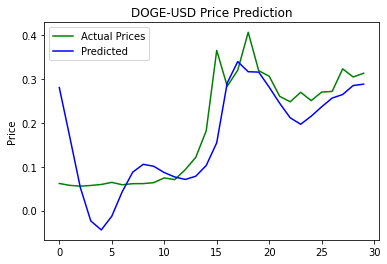

In [18]:
plt.plot(actual_prices, color='green', label='Actual Prices')
plt.plot(pred, color='blue', label='Predicted')
plt.legend(loc='upper left')
plt.title(currency + " Price Prediction")
plt.ylabel('Price')
plt.show()

In [19]:
# Bad prediction :d